In [3]:
import pandas as pd
import numpy as np
import bvista as bv

# ✅ Define number of rows & columns
num_rows = 100  # 100,000 rows
num_cols = 50  # 50 columns

# ✅ Generate random data
data = {
    f"col_{i}": np.random.randint(0, 1000, size=num_rows) if i % 2 == 0 else np.random.random(num_rows)
    for i in range(num_cols)
}

# ✅ Add diverse data types
data["id"] = np.arange(1, num_rows + 1)  # Unique IDs
data["category"] = np.random.choice(["A", "B", "C", "D"], size=num_rows)  # Categorical
data["timestamp"] = pd.date_range("2023-01-01", periods=num_rows, freq="T")  # Datetime
data["boolean"] = np.random.choice([True, False], size=num_rows)  # Boolean
data["text"] = np.random.choice(["hello", "world", "test", "data"], size=num_rows)  # Text column

# ✅ Create DataFrame
df6 = pd.DataFrame(data)




/var/folders/z0/_53pqkc52j94k8cbwvw_qgf40000gn/T/ipykernel_17181/1306418026.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data["timestamp"] = pd.date_range("2023-01-01", periods=num_rows, freq="T")  # Datetime


In [17]:
bv.show(df6)

In [1]:
import pandas as pd
import numpy as np


# ✅ Create a sample DataFrame with missing values
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", None, "David", "Eve"],
    "Age": [25, np.nan, 30, None, 28],
    "City": ["New York", "", "Los Angeles", "Chicago", None],
    "Salary": [50000, 60000, np.nan, 55000, ""],
}

df1 = pd.DataFrame(data)




In [18]:
import bvista as bv
bv.show(df1)

In [3]:
ds = df1.apply(pd.to_numeric, errors='coerce')
ds.head()

,ID,Name,Age,City,Salary
0,1,NaN,25.0,NaN,50000.0
1,2,NaN,NaN,NaN,60000.0
2,3,NaN,30.0,NaN,NaN
3,4,NaN,NaN,NaN,55000.0
4,5,NaN,28.0,NaN,NaN


In [4]:
ds.dtypes

ID          int64
Name      float64
Age       float64
City      float64
Salary    float64
dtype: object

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 100  # Number of samples

# Perfect positive correlation (+1)
x1 = np.linspace(1, 100, n)
x2 = x1  # Perfectly correlated

# Perfect negative correlation (-1)
x3 = -x1  # Perfectly anti-correlated

# High positive correlation (~0.8)
x4 = x1 * 0.8 + np.random.normal(0, 5, n)

# High negative correlation (~-0.8)
x5 = -x1 * 0.8 + np.random.normal(0, 5, n)

# Low positive correlation (~0.3)
x6 = x1 * 0.3 + np.random.normal(0, 10, n)

# Low negative correlation (~-0.3)
x7 = -x1 * 0.3 + np.random.normal(0, 10, n)

# No correlation (~0.0)
x8 = np.random.normal(50, 25, n)

# Create DataFrame
df7 = pd.DataFrame({
    "Perfect_Positive": x1,
    "Perfect_Negative": x3,
    "High_Positive": x4,
    "High_Negative": x5,
    "Low_Positive": x6,
    "Low_Negative": x7,
    "No_Correlation": x8
})






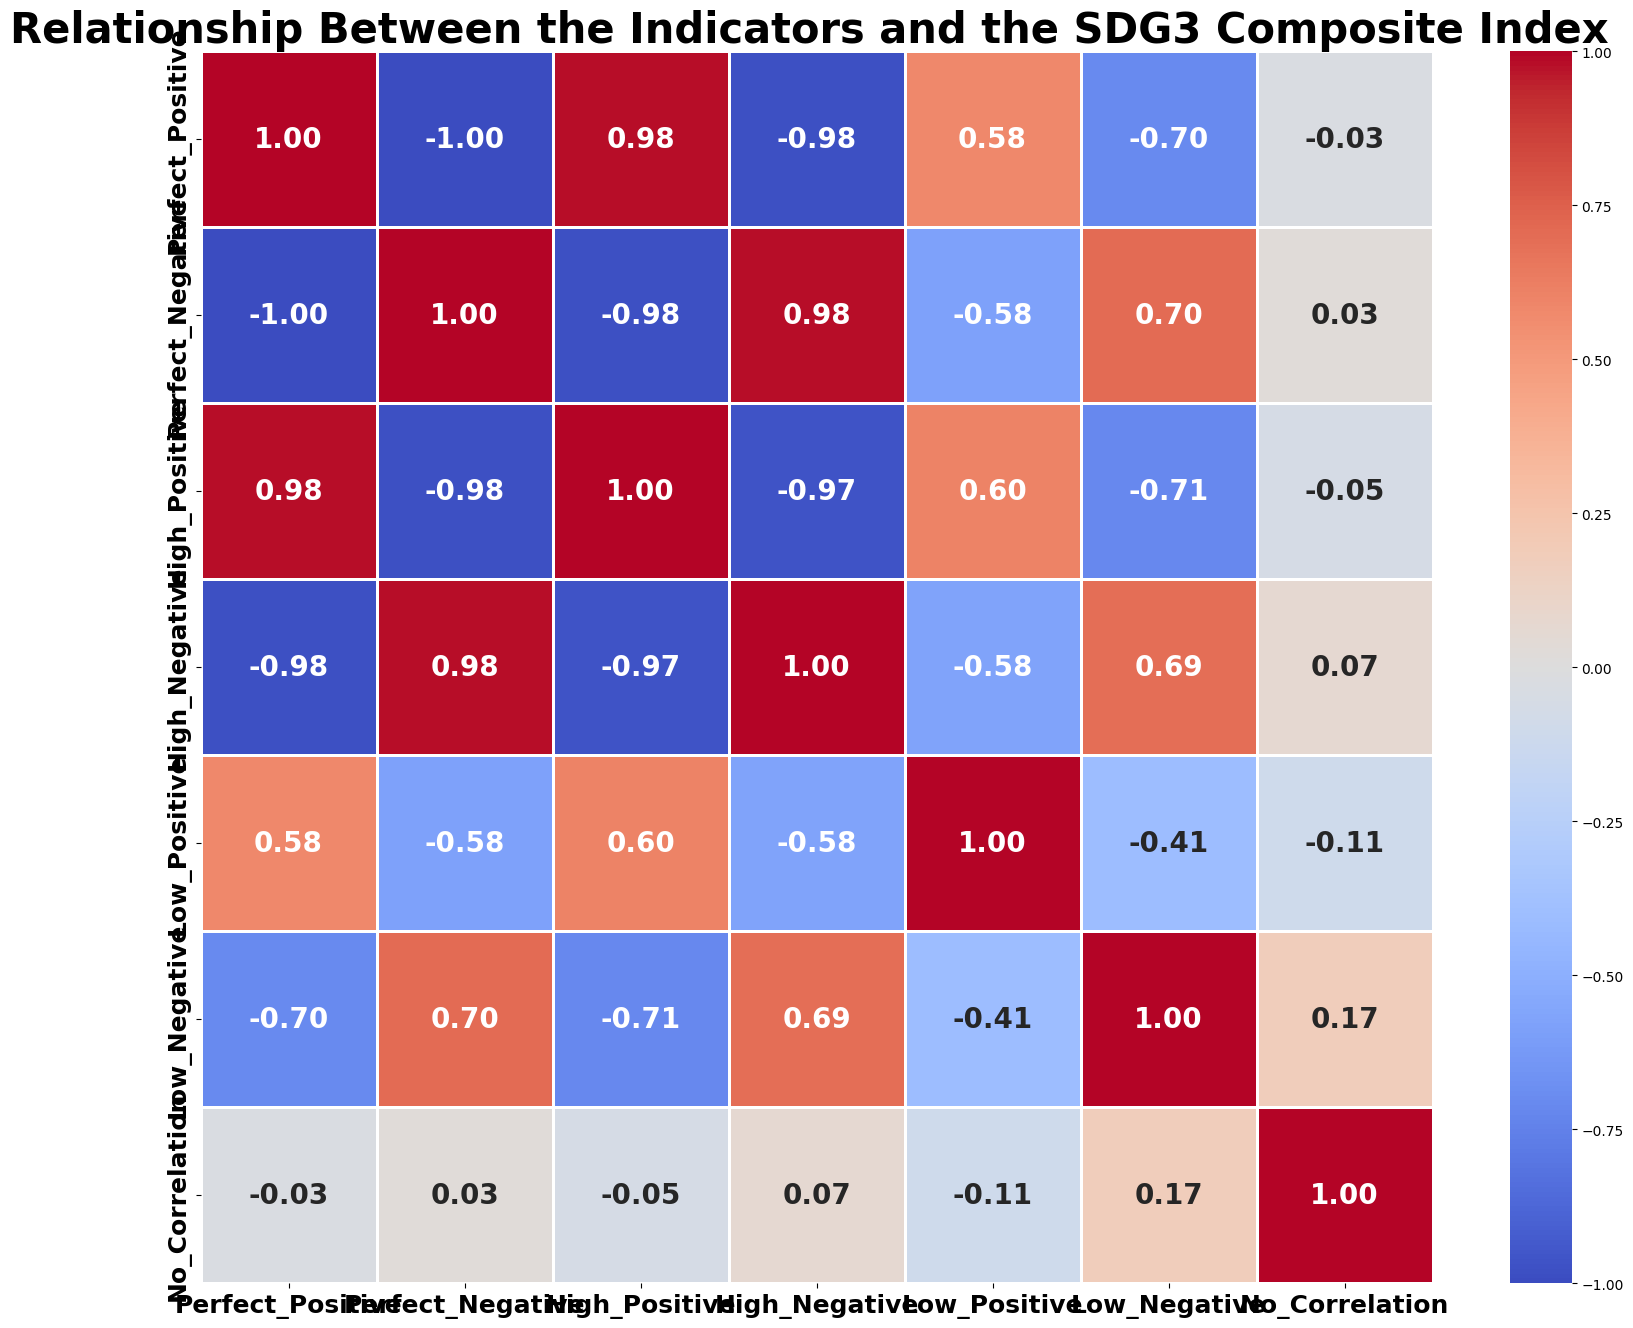

In [10]:

# Calculate the correlation matrix
correlation_matrix2 = df7.corr()
#correlation_matrix                                             
# Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=1, square=True, fmt='.2f', annot_kws={'size': 20, 'weight': 'bold'}, vmin=-1, vmax=1)
plt.title('Relationship Between the Indicators and the SDG3 Composite Index ', fontsize=30, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=18)
plt.yticks(fontweight='bold', fontsize=18)
plt.show()   

In [22]:
bv.show(df7)

In [7]:
numeric_cols = ds.select_dtypes(include=['number']).corr()

In [8]:
numeric_cols

,ID,Name,Age,City,Salary
ID,1.000000,NaN,0.59604,NaN,0.327327
Name,NaN,NaN,NaN,NaN,NaN
Age,0.596040,NaN,1.00000,NaN,NaN
City,NaN,NaN,NaN,NaN,NaN
Salary,0.327327,NaN,NaN,NaN,1.000000


In [4]:
df1.isnull().sum()

ID        0
Name      1
Age       2
City      1
Salary    1
dtype: int64

In [3]:
df1.describe()

,ID,Age
count,5.000000,3.000000
mean,3.000000,27.666667
std,1.581139,2.516611
min,1.000000,25.000000
25%,2.000000,26.500000
50%,3.000000,28.000000
75%,4.000000,29.000000
max,5.000000,30.000000


In [3]:
df1.describe(include='all')

,ID,Name,Age,City,Salary
count,5.000000,4,3.000000,4,4.0
unique,NaN,4,NaN,4,4.0
top,NaN,Alice,NaN,New York,50000.0
freq,NaN,1,NaN,1,1.0
mean,3.000000,NaN,27.666667,NaN,NaN
std,1.581139,NaN,2.516611,NaN,NaN
min,1.000000,NaN,25.000000,NaN,NaN
25%,2.000000,NaN,26.500000,NaN,NaN
50%,3.000000,NaN,28.000000,NaN,NaN
75%,4.000000,NaN,29.000000,NaN,NaN


In [5]:
# droping the index column "unnamed :0"
df2 = pd.read_csv("Advertising.csv", index_col=0)
df2.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [20]:
bv.show(df2)

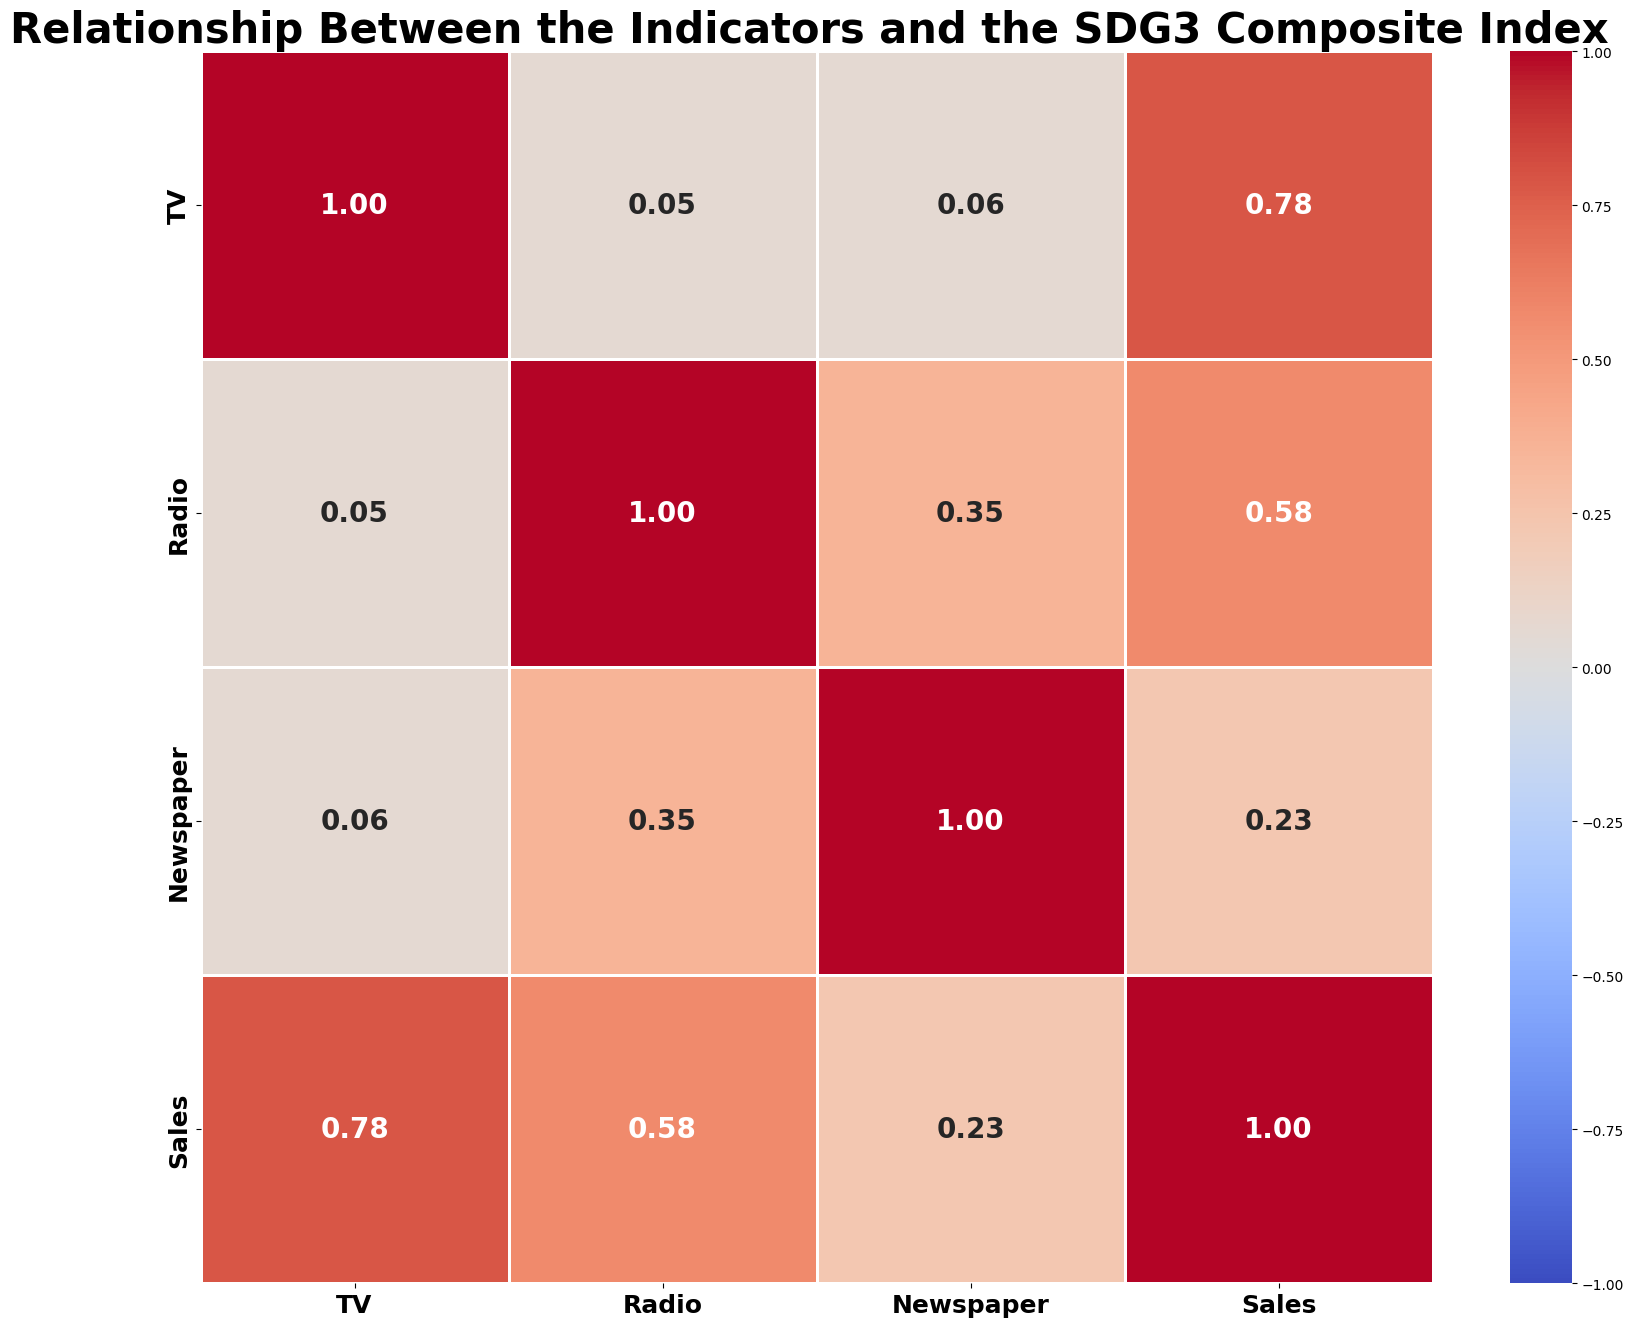

In [ ]:
# Selecting the columns containing indicators and pc"s for relationship analysis


# Calculate the correlation matrix
correlation_matrix2 = df2.corr()
#correlation_matrix                                             
# Create a heatmap to visualize the correlations
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', linewidths=1, square=True, fmt='.2f', annot_kws={'size': 20, 'weight': 'bold'}, vmin=-1, vmax=1)
plt.title('Relationship Between the Indicators and the SDG3 Composite Index ', fontsize=30, fontweight='bold')
plt.xticks(fontweight='bold', fontsize=18)
plt.yticks(fontweight='bold', fontsize=18)
plt.show()                                                                                                                                                                                                                                                                                  

In [8]:
import pandas as pd
import numpy as np
import random
import uuid
from datetime import datetime, timedelta

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate 100 rows of mixed messy data
num_rows = 100

# Generate random dates and times
random_dates = [datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365), hours=random.randint(0, 23), minutes=random.randint(0, 59)) for _ in range(num_rows)]
random_strings = ["hello", "world", "random", "data", "test", None, "string123", "45", "special@#$%", "NaN"]
random_categories = ["A", "B", "C", None, "D", "E"]
random_ip_addresses = [f"192.168.1.{random.randint(1, 255)}" for _ in range(num_rows)]

# Constructing the DataFrame with messy data
data = {
    "ID": list(range(1, num_rows + 1)),
    "Name": [random.choice(["Alice", "Bob", "Charlie", "David", None, "Eve", "Frank", "Grace"]) for _ in range(num_rows)],
    "Age": [random.choice([random.randint(18, 70), None]) for _ in range(num_rows)],
    "Salary": [random.choice([random.uniform(30000, 100000), None, "$50000", "NaN"]) for _ in range(num_rows)],
    "City": [random.choice(["New York", "Los Angeles", "Chicago", None, "San Francisco", "Houston"]) for _ in range(num_rows)],
    "Date_of_Joining": random_dates,
    "Last_Login": [random.choice([random.choice(random_dates), "NaN", None]) for _ in range(num_rows)],
    "Boolean_Column": [random.choice([True, False, "yes", "no", None, "True", "False"]) for _ in range(num_rows)],
    "Category_Column": [random.choice(random_categories) for _ in range(num_rows)],
    "IP_Address": random_ip_addresses,
    "Email": [random.choice(["test@example.com", "user@gmail.com", None, "random@data.com", "invalid-email"]) for _ in range(num_rows)],
    "Currency_Column": [random.choice(["$100.50", "€200.00", "¥3000", None, "£50", "CHF 75.75"]) for _ in range(num_rows)],
    "Percentage_Column": [random.choice(["50%", "75%", "100%", None, "25%", "NaN"]) for _ in range(num_rows)],
    "Mixed_Column": [random.choice(["123", "hello", None, 456, "78.9", "NaN", "False", "$500", "%20", "string"]) for _ in range(num_rows)],
    "List_Column": [random.choice([[1, 2, 3], ["a", "b", "c"], None, "random", "string", ["%", "$", "€"]]) for _ in range(num_rows)],
    "Dict_Column": [random.choice([{"key": "value"}, None, {"num": 123}, "invalid"]) for _ in range(num_rows)],
    "UUID_Column": [str(uuid.uuid4()) if random.random() > 0.1 else None for _ in range(num_rows)],
}

# Create DataFrame
df_messy = pd.DataFrame(data)




In [9]:
import bvista as bv
bv.show(df_messy)

In [7]:
import pandas as pd
import numpy as np
import json

# Create a highly dirty dataset with multiple data types
dirty_data = {
    "int_col": [1, "two", None, 4, np.nan, 6, "?", 8, None, 10],  # Mixed integers and strings
    "float_col": [1.5, None, 3.2, np.nan, 5.0, "six", 7.89, "?", 9.0, None],  # Mixed floats and strings
    "str_col": ["apple", None, "banana", "123", np.nan, "cherry", "42.5", "data", None, "grape"],  # Strings mixed with numbers
    "bool_col": [True, False, None, True, np.nan, "yes", "no", 1, 0, None],  # Boolean with mixed representations
    "datetime_col": [
        pd.Timestamp("2023-01-01"), "2023/02/15", None, pd.NaT, 
        "15-03-2023", "April 1, 2023", "2023-05-10 12:30", np.nan, "invalid_date", pd.Timestamp("2023-06-20")
    ],  # Mixed datetime formats
    "timedelta_col": [pd.Timedelta(days=1), "2 days", None, "NaT", "5 hours", pd.NaT, "invalid", "30 min", "1 week", "6 days"],  # Mixed timedelta
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan, "E", "F", "B", "C", "D"]),  # Categories with missing values
    "currency_col": ["$10.00", "$20.50", None, np.nan, "$50.00", "€30.00", "£15.75", "100.00 USD", "invalid", "$5.99"],  # Currency formatted
    "percentage_col": ["25%", "50%", None, np.nan, "100%", "33.33%", "0.85", "invalid", "75%", "10%"],  # Percentage formatted
    "json_col": [
        '{"name": "Alice", "age": 25}', None, '{}', '{"city": "NY"}', 
        np.nan, '[1, 2, 3]', '{"nested": {"key": "value"}}', "invalid_json", '["a", "b", "c"]', None
    ],  # JSON and lists
    "mixed_col": [1, "two", 3.5, None, "NaN", True, "False", pd.Timestamp("2023-04-10"), None, {"key": "value"}]  # Mixed types
}

# Convert to DataFrame
dirty_df = pd.DataFrame(dirty_data)

# Display the DataFrame



In [8]:
dirty_df.head(14)

,int_col,float_col,str_col,bool_col,datetime_col,timedelta_col,category_col,currency_col,percentage_col,json_col,mixed_col
0,1,1.5,apple,True,2023-01-01 00:00:00,1 days 00:00:00,A,$10.00,25%,"{""name"": ""Alice"", ""age"": 25}",1
1,two,None,None,False,2023/02/15,2 days,B,$20.50,50%,None,two
2,None,3.2,banana,None,None,None,NaN,None,None,{},3.5
3,4,NaN,123,True,NaT,NaT,D,NaN,NaN,"{""city"": ""NY""}",None
4,NaN,5.0,NaN,NaN,15-03-2023,5 hours,NaN,$50.00,100%,NaN,NaN
5,6,six,cherry,yes,"April 1, 2023",NaT,E,€30.00,33.33%,"[1, 2, 3]",True
6,?,7.89,42.5,no,2023-05-10 12:30,invalid,F,£15.75,0.85,"{""nested"": {""key"": ""value""}}",False
7,8,?,data,1,NaN,30 min,B,100.00 USD,invalid,invalid_json,2023-04-10 00:00:00
8,None,9.0,None,0,invalid_date,1 week,C,invalid,75%,"[""a"", ""b"", ""c""]",None
9,10,None,grape,None,2023-06-20 00:00:00,6 days,D,$5.99,10%,None,{'key': 'value'}


In [4]:
dirty_df.dtypes

int_col             object
float_col           object
str_col             object
bool_col            object
datetime_col        object
timedelta_col       object
category_col      category
currency_col        object
percentage_col      object
json_col            object
mixed_col           object
dtype: object

In [9]:
import bvista as bv
bv.show(dirty_df)

✅ Dataset 'dirty_df' uploaded successfully. Session ID: dirty_df


In [1]:
import pandas as pd
import bvista as bv
import numpy as np

data = {
    "int_col": [1, 2, None, 4, np.nan],
    "float_col": [1.5, None, 3.2, np.nan, 5.0],
    "str_col": ["apple", None, "banana", "cherry", np.nan],
    "bool_col": [True, False, None, True, np.nan],
    "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],
    "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),
    "currency_col": [10.0, 20.5, None, np.nan, 50.0],
    "percentage_col": [0.25, 0.50, None, np.nan, 1.0],
}

df5 = pd.DataFrame(data)




In [2]:
bv.show(df5)

In [3]:
import requests
response = requests.get("http://127.0.0.1:5050/api/get_sessions")
print(response.json())  # The name should now match what you passed in `bv.show(df5)`


{'sessions': {'df5': {'created_at': 1740755021.7707462, 'name': 'dataset'}}}


In [3]:
import requests
response = requests.get("http://127.0.0.1:5050/api/session/df5")
print(response.json())  # It should return correct data without errors.


{'columns': [{'dataType': 'float64', 'field': 'int_col', 'headerName': 'int_col'}, {'dataType': 'float64', 'field': 'float_col', 'headerName': 'float_col'}, {'dataType': 'object', 'field': 'str_col', 'headerName': 'str_col'}, {'dataType': 'object', 'field': 'bool_col', 'headerName': 'bool_col'}, {'dataType': 'datetime64[ns]', 'field': 'datetime_col', 'headerName': 'datetime_col'}, {'dataType': 'timedelta64[ns]', 'field': 'timedelta_col', 'headerName': 'timedelta_col'}, {'dataType': 'category', 'field': 'category_col', 'headerName': 'category_col'}, {'dataType': 'float64', 'field': 'currency_col', 'headerName': 'currency_col'}, {'dataType': 'float64', 'field': 'percentage_col', 'headerName': 'percentage_col'}], 'data': [{'bool_col': True, 'category_col': 'A', 'currency_col': 10.0, 'datetime_col': 'Sun, 01 Jan 2023 00:00:00 GMT', 'float_col': 1.5, 'int_col': 1.0, 'percentage_col': 0.25, 'str_col': 'apple', 'timedelta_col': '1 days'}, {'bool_col': False, 'category_col': 'B', 'currency_col

In [14]:
import pandas as pd
import bvista as bv
import numpy as np

data = {
    "int_col": [1, 2, None, 4, np.nan],
    "float_col": [1.5, None, 3.2, np.nan, 5.0],
    "str_col": ["apple", None, "banana", "cherry", np.nan],
    "bool_col": [True, False, None, True, np.nan],
    "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],
    "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),
    "currency_col": [10.0, 20.5, None, np.nan, 50.0],
    "percentage_col": [0.25, 0.50, None, np.nan, 1.0],
}

df5 = pd.DataFrame(data)


In [15]:
bv.show(df5)

In [12]:
import pandas as pd
import numpy as np
import json

# Generate a highly complex and diverse DataFrame
data = {
    "int_col": [1, 2, None, 4, np.nan, -100, 9999999],
    "float_col": [1.5, None, 3.2, np.nan, 5.0, -10.75, 3.141592],
    "str_col": ["apple", None, "banana", "cherry", np.nan, "123", "special_char_!@#"],
    "bool_col": [True, False, None, True, np.nan, False, True],
    "datetime_col": [
        pd.Timestamp("2023-01-01"),
        None,
        pd.NaT,
        pd.Timestamp("2023-04-01"),
        pd.NaT,
        pd.Timestamp("1999-12-31"),
        pd.Timestamp("2050-06-15 12:45:30")
    ],
    "timedelta_col": [
        pd.Timedelta(days=1),
        None,
        pd.NaT,
        pd.Timedelta(days=4, hours=5, minutes=30),
        pd.NaT,
        pd.Timedelta(seconds=3600),
        pd.Timedelta(weeks=3)
    ],
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan, "E", "F"]),
    "currency_col": ["$10.00", "$20.50", None, "NaN", "€50.00", "£100.75", "¥5000"],
    "percentage_col": ["25%", "50%", None, "NaN", "100%", "12.5%", "87.3%"],
    "json_col": [
        json.dumps({"key": "value"}),
        json.dumps({"number": 123}),
        None,
        json.dumps({"bool": True}),
        json.dumps({"list": [1, 2, 3]}),
        json.dumps({"nested": {"a": 1, "b": [4, 5, 6]}}),
        json.dumps({"special_chars": "!@#$%^&*()"})
    ],
    "mixed_col": [10, "string", None, 3.5, True, pd.Timestamp("2025-01-01"), {}],
}

# Create DataFrame
df_complex = pd.DataFrame(data)




In [13]:
bv.show(df_complex)

In [11]:
df_complex.dtypes

int_col                   float64
float_col                 float64
str_col                    object
bool_col                   object
datetime_col       datetime64[ns]
timedelta_col     timedelta64[ns]
category_col             category
currency_col               object
percentage_col             object
json_col                   object
mixed_col                  object
dtype: object

In [10]:
import pandas as pd
import numpy as np
import json

data = {
    "int_col": [1, "two", None, 4, np.nan],  # Mixed int & str
    "float_col": [1.5, "2.3", None, np.nan, 5.0],  # Mixed float & str
    "str_col": ["apple", None, "banana", "cherry", np.nan],  # Standard string column
    "bool_col_mixed": [True, "Yes", "No", False, None],  # Mixed Boolean representations
    "bool_col_standard": [True, False, True, False, None],  # Standard True/False
    "bool_col_numeric": [1, 0, 1, np.nan, None],  # Boolean as 1/0
    "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), "InvalidDate"],  # Dates with an invalid value
    "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), "5 days"],  # Timedelta with mixed formats
    "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),  # Categorical column
    "currency_col": ["$10.00", "$20.50", None, np.nan, "50.00 USD"],  # Different currency formats
    "percentage_col": ["10%", "20.5%", None, "NaN", "0.5"],  # Percentage formats
    "json_col": [
        json.dumps({"key": "value"}),
        json.dumps({"user": "John", "age": 30}),
        None,
        json.dumps({"active": False}),
        "InvalidJSON"
    ],  # JSON-like strings with an invalid entry
    "mixed_col": [42, "text", None, 3.14, {"unexpected": "dict"}]  # Completely mixed types
}

df_test = pd.DataFrame(data)

# Show the DataFrame in B-Vista
import bvista as bv
bv.show(df_test, name="dirty_test")


In [13]:
df_test.head()

,int_col,float_col,str_col,bool_col_mixed,bool_col_standard,bool_col_numeric,datetime_col,timedelta_col,category_col,currency_col,percentage_col,json_col,mixed_col
0,1,1.5,apple,True,True,1.0,2023-01-01 00:00:00,1 days 00:00:00,A,$10.00,10%,"{""key"": ""value""}",42
1,two,2.3,None,Yes,False,0.0,None,None,B,$20.50,20.5%,"{""user"": ""John"", ""age"": 30}",text
2,None,None,banana,No,True,1.0,NaT,NaT,NaN,None,None,None,None
3,4,NaN,cherry,False,False,NaN,2023-04-01 00:00:00,4 days 00:00:00,D,NaN,NaN,"{""active"": false}",3.14
4,NaN,5.0,NaN,None,None,NaN,InvalidDate,5 days,NaN,50.00 USD,0.5,InvalidJSON,{'unexpected': 'dict'}


In [11]:
import pandas as pd
import numpy as np
import json
import uuid

# Generate test data
data = {
    "int_col": [1, -2, 3000000, None, np.nan],  # Integer with large values
    "float_col": [1.5, -2.345, 3.2e5, np.nan, 5.0],  # Float with scientific notation
    "bool_col_standard": [True, False, None, True, False],  # Standard boolean
    "bool_col_mixed": ["Yes", "No", 1, 0, None],  # Boolean in multiple formats
    "str_col": ["hello", "123", "!@#%", "Üñîçødê", None],  # String with Unicode and special chars
    "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), "InvalidDate"],  # Datetime with invalid case
    "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(weeks=2), "5 days"],  # Timedelta
    "category_col": pd.Categorical(["Red", "Green", "Blue", "Yellow", None]),  # Categorical column
    "currency_col": ["$10.00", "€20,50", None, np.nan, "50.00 USD"],  # Various currency formats
    "percentage_col": ["10%", "20.5%", None, "NaN", "0.5"],  # Percentages in different styles
    "json_col": [
        json.dumps({"key": "value"}),
        json.dumps({"user": "John", "age": 30}),
        None,
        json.dumps({"active": False}),
        "InvalidJSON"
    ],  # JSON in string format
    "uuid_col": [str(uuid.uuid4()) for _ in range(5)],  # Unique Identifiers (UUIDs)
    "ip_address_col": ["192.168.1.1", "10.0.0.1", None, "172.16.254.1", "InvalidIP"],  # IP addresses
    "email_col": ["user@example.com", "test@domain.net", None, "email@invalid", "admin@site.com"],  # Email addresses
    "binary_col": [b"binary1", b"binary2", None, b"binary4", b"binary5"],  # Binary data
    "geo_latitude": [40.7128, -34.6037, None, 51.5074, 35.6895],  # Latitude
    "geo_longitude": [-74.0060, -58.3816, None, -0.1278, 139.6917],  # Longitude
    "list_col": [[1, 2, 3], ["a", "b", "c"], None, [None, 4.5], "InvalidList"],  # Lists stored as strings
    "dict_col": [
        json.dumps({"a": 1, "b": 2}),
        json.dumps({"x": "y"}),
        None,
        json.dumps({"nested": {"inside": "dict"}}),
        "InvalidDict"
    ],  # Dictionaries stored as JSON strings
    "mixed_col": [42, "text", None, 3.14, {"unexpected": "dict"}]  # Mixed types
}

df_complete = pd.DataFrame(data)

# Show the DataFrame in B-Vista
import bvista as bv
bv.show(df_complete, name="complete_test")


In [17]:
df_complete.head()

,int_col,float_col,bool_col_standard,bool_col_mixed,str_col,datetime_col,timedelta_col,category_col,currency_col,percentage_col,json_col,uuid_col,ip_address_col,email_col,binary_col,geo_latitude,geo_longitude,list_col,dict_col,mixed_col
0,1.0,1.500,True,Yes,hello,2023-01-01 00:00:00,1 days 00:00:00,Red,$10.00,10%,"{""key"": ""value""}",c64ae955-ed4b-4b56-b570-1a219a088f4e,192.168.1.1,user@example.com,b'binary1',40.7128,-74.0060,"[1, 2, 3]","{""a"": 1, ""b"": 2}",42
1,-2.0,-2.345,False,No,123,None,None,Green,"€20,50",20.5%,"{""user"": ""John"", ""age"": 30}",35bb2f4d-7592-4b64-ba22-fb319015bc26,10.0.0.1,test@domain.net,b'binary2',-34.6037,-58.3816,"[a, b, c]","{""x"": ""y""}",text
2,3000000.0,320000.000,None,1,!@#%,NaT,NaT,Blue,None,None,None,f7c8d85b-e117-4317-88a2-965026f0b5a9,None,None,None,NaN,NaN,None,None,None
3,NaN,NaN,True,0,Üñîçødê,2023-04-01 00:00:00,14 days 00:00:00,Yellow,NaN,NaN,"{""active"": false}",8c336e2a-4ba3-447c-af7f-9fc121d17e04,172.16.254.1,email@invalid,b'binary4',51.5074,-0.1278,"[None, 4.5]","{""nested"": {""inside"": ""dict""}}",3.14
4,NaN,5.000,False,None,None,InvalidDate,5 days,NaN,50.00 USD,0.5,InvalidJSON,961329ec-bd44-4712-87f9-733066971f37,InvalidIP,admin@site.com,b'binary5',35.6895,139.6917,InvalidList,InvalidDict,{'unexpected': 'dict'}


In [3]:
df_complete.dtypes

int_col               float64
float_col             float64
bool_col_standard      object
bool_col_mixed         object
str_col                object
datetime_col           object
timedelta_col          object
category_col         category
currency_col           object
percentage_col         object
json_col               object
uuid_col               object
ip_address_col         object
email_col              object
binary_col             object
geo_latitude          float64
geo_longitude         float64
list_col               object
dict_col               object
mixed_col              object
dtype: object

In [1]:
data = {
        "int_col": [1, 2, None, 4, np.nan],  # ✅ int64 with NaN
        "float_col": [1.5, None, "you", np.nan, 5.0],  # ✅ float64 with NaN
        "str_col": ["apple", None, "banana", "cherry", np.nan],  # ✅ object with None/NaN
        "bool_col": [True, False, None, "come", np.nan],  # ✅ boolean with NaN
        "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],  # ✅ datetime64 with NaT
        "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],  # ✅ timedelta64 with NaT
        "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),  # ✅ category with missing values
        "currency_col": [10.0, 20.5, None, np.nan, 50.0],  # ✅ float (to be formatted as currency)
        "percentage_col": [0.25, 0.50, None, np.nan, 1.0],  # ✅ float (to be converted to percentage)
    }

df = pd.DataFrame(data)
bv.show(df)

NameError: name 'np' is not defined

In [1]:
import bvista as bv
import pandas as pd
import numpy as np

# Generate a large dataset with 100000 rows and 50 columns
np.random.seed(42)
num_rows = 100
num_cols = 50

columns = [f"Col_{i}" for i in range(1, num_cols + 1)]
data = np.random.randint(1, 100, size=(num_rows, num_cols))

df_large = pd.DataFrame(data, columns=columns)



In [2]:
# Show the large dataset in B-Vista
bv.show(df_large)


In [6]:
# Show the large dataset in B-Vista
bv.show(df)

In [3]:

import bvista as bv
import pandas as pd
import numpy as np


data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "David", "Moses"],
    "Score": [95, 80, 75, 85, 90]
}
df2 = pd.DataFrame(data)

bv.show(df2)


In [ ]:
#f9f9f9 

In [4]:
bv.show(df2)

In [1]:
import pandas as pd
import numpy as np

# ✅ Generate a sample DataFrame with various data types
df3 = pd.DataFrame({
    "IntegerColumn": [1, 2, 3, 4, 5],  # int64
    "FloatColumn": [1.1, 2.2, 3.3, 4.4, 5.5],  # float64
    "StringColumn": ["A", "B", "C", "D", "E"],  # object (string)
    "BooleanColumn": [True, False, True, False, True],  # bool
    "DatetimeColumn": pd.date_range(start="2025-01-01", periods=5, freq="D"),  # datetime64
    "TimedeltaColumn": pd.to_timedelta([1, 2, 3, 4, 5], unit="D"),  # timedelta64
    "CategoryColumn": pd.Categorical(["Small", "Medium", "Large", "Small", "Medium"])  # category
})

df3.head()


,IntegerColumn,FloatColumn,StringColumn,BooleanColumn,DatetimeColumn,TimedeltaColumn,CategoryColumn
0,1,1.1,A,True,2025-01-01,1 days,Small
1,2,2.2,B,False,2025-01-02,2 days,Medium
2,3,3.3,C,True,2025-01-03,3 days,Large
3,4,4.4,D,False,2025-01-04,4 days,Small
4,5,5.5,E,True,2025-01-05,5 days,Medium


In [2]:
import bvista as bv

bv.show(df3)

In [4]:
import pandas as pd
import numpy as np
import bvista as bv

# ✅ Create a sample DataFrame with missing values
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "", "David", "Eve"],
    "Age": [25, 7, 30, None, 28],
    "City": ["New York", "yuu", "Los Angeles", "Chicago", ""],
    "Salary": [50000, 60000, 5, 55000, 65000],
}

df4 = pd.DataFrame(data)



bv.show(df4)


In [5]:
bv.show(df4)

In [6]:
import pandas as pd
import numpy as np
import bvista as bv

# ✅ Create a sample DataFrame with missing values
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", None, "David", "Eve"],
    "Age": [25, np.nan, 30, None, 28],
    "City": ["New York", "Henry", "Los Angeles", "Chicago", None],
    "Salary": [50000, 60000, np.nan, 55000, 70000],
}

df4 = pd.DataFrame(data)



bv.show(df4)


In [1]:
import pandas as pd
import numpy as np
import bvista as bv


In [2]:
data = {
        "int_col": [1, 2, None, 4, np.nan],  # ✅ int64 with NaN
        "float_col": [1.5, None, 3.2, np.nan, 5.0],  # ✅ float64 with NaN
        "str_col": ["apple", None, "banana", "cherry", np.nan],  # ✅ object with None/NaN
        "bool_col": [True, False, None, True, np.nan],  # ✅ boolean with NaN
        "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],  # ✅ datetime64 with NaT
        "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],  # ✅ timedelta64 with NaT
        "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),  # ✅ category with missing values
        "currency_col": [10.0, 20.5, None, np.nan, 50.0],  # ✅ float (to be formatted as currency)
        "percentage_col": [0.25, 0.50, None, np.nan, 1.0],  # ✅ float (to be converted to percentage)
    }

df5 = pd.DataFrame(data)

bv.show(df5)

In [3]:
df5.dtypes

int_col                   float64
float_col                 float64
str_col                    object
bool_col                   object
datetime_col       datetime64[ns]
timedelta_col     timedelta64[ns]
category_col             category
currency_col              float64
percentage_col            float64
dtype: object

In [28]:
dtype_mapping = df5.dtypes.apply(lambda x: str(x)).to_dict()
print(dtype_mapping)

{'int_col': 'float64', 'float_col': 'float64', 'str_col': 'object', 'bool_col': 'object', 'datetime_col': 'datetime64[ns]', 'timedelta_col': 'timedelta64[ns]', 'category_col': 'category', 'currency_col': 'float64', 'percentage_col': 'float64'}


In [43]:
dtype_mapping.values()

dict_values(['float64', 'float64', 'object', 'object', 'datetime64[ns]', 'timedelta64[ns]', 'category', 'float64', 'float64'])

In [4]:
df5.to_csv('data.csv', index=False)

In [5]:
df7 = pd.read_csv('data.csv')  

df7.head()

,int_col,float_col,str_col,bool_col,datetime_col,timedelta_col,category_col,currency_col,percentage_col
0,1.0,1.5,apple,True,2023-01-01,1 days,A,10.0,0.25
1,2.0,NaN,NaN,False,NaN,NaN,B,20.5,0.50
2,NaN,3.2,banana,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,cherry,True,2023-04-01,4 days,D,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,50.0,1.00


In [6]:
df7.dtypes

int_col           float64
float_col         float64
str_col            object
bool_col           object
datetime_col       object
timedelta_col      object
category_col       object
currency_col      float64
percentage_col    float64
dtype: object

In [ ]:
# ✅ Route: Retrieve dataset

def get_data(df):


   

   

    # ✅ Get the correct data types for each column
    dtype_mapping = df.dtypes.apply(lambda x: str(x)).to_dict()

    # ✅ Convert DataFrame to JSON-safe dictionary
    data_json_safe = df.to_dict(orient="records")

    # ✅ Replace NaN values with a special value
    for row in data_json_safe:
        for col, value in row.items():
            if pd.isna(value):
                row[col] = None

    return jsonify({

        "name": session["name"],
        "data": data_json_safe,
        "columns": [
            {
                "field": col,
                "headerName": col,
                "dataType": dtype_mapping[col],
            }
            for col in df.columns
        ],
        "total_rows": df.shape[0],
        "total_columns": df.shape[1]
    }), 200

In [44]:
    # ✅ Get the correct data types for each column
dtype_mapping = df5.dtypes.apply(lambda x: str(x)).to_dict()


data_json_safe = df5.to_dict(orient="records")

    # ✅ Replace NaN values with a special value
for row in data_json_safe:
     for col, value in row.items():
          if pd.isna(value):
              row[col] = None


print({
        "columns": [
            {
                "field": col,
                "headerName": col,
                "dataType": dtype_mapping[col],
            }
            for col in df5.columns
        ],
    })

{'columns': [{'field': 'int_col', 'headerName': 'int_col', 'dataType': 'float64'}, {'field': 'float_col', 'headerName': 'float_col', 'dataType': 'float64'}, {'field': 'str_col', 'headerName': 'str_col', 'dataType': 'object'}, {'field': 'bool_col', 'headerName': 'bool_col', 'dataType': 'object'}, {'field': 'datetime_col', 'headerName': 'datetime_col', 'dataType': 'datetime64[ns]'}, {'field': 'timedelta_col', 'headerName': 'timedelta_col', 'dataType': 'timedelta64[ns]'}, {'field': 'category_col', 'headerName': 'category_col', 'dataType': 'category'}, {'field': 'currency_col', 'headerName': 'currency_col', 'dataType': 'float64'}, {'field': 'percentage_col', 'headerName': 'percentage_col', 'dataType': 'float64'}]}


In [22]:
dtype_mapping = df5.dtypes.apply(lambda x: str(x)).to_dict()

# ✅ Convert datetime and timedelta columns to strings
for col, dtype in dtype_mapping.items():
    if dtype.startswith("datetime64"):
        df5[col] = df5[col].dt.strftime('%Y-%m-%d %H:%M:%S')
        dtype_mapping[col] = "string"
    elif dtype.startswith("timedelta64"):
        df5[col] = df5[col].dt.total_seconds()
        dtype_mapping[col] = "float64"

# ✅ Convert category columns to strings
for col, dtype in dtype_mapping.items():
    if dtype.startswith("category"):
        df5[col] = df5[col].astype(str)
        dtype_mapping[col] = "string"

print(dtype_mapping)
print(df5.dtypes)

{'int_col': 'float64', 'float_col': 'float64', 'str_col': 'object', 'bool_col': 'object', 'datetime_col': 'string', 'timedelta_col': 'float64', 'category_col': 'string', 'currency_col': 'float64', 'percentage_col': 'float64'}
int_col           float64
float_col         float64
str_col            object
bool_col           object
datetime_col       object
timedelta_col     float64
category_col       object
currency_col      float64
percentage_col    float64
dtype: object


In [23]:
dtype_mapping = df5.dtypes.apply(lambda x: str(x)).to_dict()

    # ✅ Convert datetime and timedelta columns to strings
for col, dtype in dtype_mapping.items():
    print(col, dtype)

int_col float64
float_col float64
str_col object
bool_col object
datetime_col object
timedelta_col float64
category_col object
currency_col float64
percentage_col float64


In [9]:
dtype_mapping = df5.dtypes.apply(lambda x: str(x)).to_dict()

    # ✅ Convert datetime and timedelta columns to strings
for col, dtype in dtype_mapping.items():
    if dtype.startswith("datetime64") or dtype.startswith("timedelta64"):
        df5[col] = df5[col].dt.strftime('%Y-%m-%d %H:%M:%S') if dtype.startswith("datetime64[ns]") else df5[col].dt.total_seconds()

    # ✅ Convert category columns to strings
for col, dtype in dtype_mapping.items():
     if dtype.startswith("category"):
         df5[col] = df5[col].astype(str)


print(df5.dtypes)

int_col           float64
float_col         float64
str_col            object
bool_col           object
datetime_col       object
timedelta_col     float64
category_col       object
currency_col      float64
percentage_col    float64
dtype: object


In [4]:
bv.show(df5)

In [1]:
import pandas as pd
import numpy as np



data = {
        "int_col": [1, 2, None, 4, np.nan],  # ✅ int64 with NaN
        "float_col": [1.5, None, "you", np.nan, 5.0],  # ✅ float64 with NaN
        "str_col": ["apple", None, "banana", "cherry", np.nan],  # ✅ object with None/NaN
        "bool_col": [True, False, None, "come", np.nan],  # ✅ boolean with NaN
        "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],  # ✅ datetime64 with NaT
        "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],  # ✅ timedelta64 with NaT
        "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),  # ✅ category with missing values
        "currency_col": [10.0, 20.5, None, np.nan, 50.0],  # ✅ float (to be formatted as currency)
        "percentage_col": [0.25, 0.50, None, np.nan, 1.0],  # ✅ float (to be converted to percentage)
    }

df = pd.DataFrame(data)
bv.show(df)

NameError: name 'bv' is not defined

In [11]:
data = {
        "int_col": [1, 2, None, 4, np.nan],  # ✅ int64 with NaN
        "float_col": [1.5, None, 3.2, np.nan, 5.0],  # ✅ float64 with NaN
        "str_col": ["apple", None, "banana", "cherry", np.nan],  # ✅ object with None/NaN
        "bool_col": [True, False, None, True, np.nan],  # ✅ boolean with NaN
        "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],  # ✅ datetime64 with NaT
        "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],  # ✅ timedelta64 with NaT
        "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),  # ✅ category with missing values
        "currency_col": [10.0, 20.5, None, np.nan, 50.0],  # ✅ float (to be formatted as currency)
        "percentage_col": [0.25, 0.50, None, np.nan, 1.0],  # ✅ float (to be converted to percentage)
    }

df5 = pd.DataFrame(data)

print(df5.dtypes)

print(df5.isna().sum())

int_col                   float64
float_col                 float64
str_col                    object
bool_col                   object
datetime_col       datetime64[ns]
timedelta_col     timedelta64[ns]
category_col             category
currency_col              float64
percentage_col            float64
dtype: object
int_col           2
float_col         2
str_col           2
bool_col          2
datetime_col      3
timedelta_col     3
category_col      2
currency_col      2
percentage_col    2
dtype: int64


In [7]:
data = {
        "int_col": [1, 2, None, 4, np.nan],  # ✅ int64 with NaN
        "float_col": [1.5, None, "you", np.nan, 5.0],  # ✅ float64 with NaN
        "str_col": ["apple", None, "banana", "cherry", np.nan],  # ✅ object with None/NaN
        "bool_col": [True, False, None, "come", np.nan],  # ✅ boolean with NaN
        "datetime_col": [pd.Timestamp("2023-01-01"), None, pd.NaT, pd.Timestamp("2023-04-01"), pd.NaT],  # ✅ datetime64 with NaT
        "timedelta_col": [pd.Timedelta(days=1), None, pd.NaT, pd.Timedelta(days=4), pd.NaT],  # ✅ timedelta64 with NaT
        "category_col": pd.Categorical(["A", "B", None, "D", np.nan]),  # ✅ category with missing values
        "currency_col": [10.0, 20.5, None, np.nan, 50.0],  # ✅ float (to be formatted as currency)
        "percentage_col": [0.25, 0.50, None, np.nan, 1.0],  # ✅ float (to be converted to percentage)
    }

df6 = pd.DataFrame(data)

In [9]:
print(df6.dtypes)

print(df6.isna().sum())

int_col                   float64
float_col                  object
str_col                    object
bool_col                   object
datetime_col       datetime64[ns]
timedelta_col     timedelta64[ns]
category_col             category
currency_col              float64
percentage_col            float64
dtype: object
int_col           2
float_col         2
str_col           2
bool_col          2
datetime_col      3
timedelta_col     3
category_col      2
currency_col      2
percentage_col    2
dtype: int64


In [30]:
print(df3.dtypes)

print(df3.isna().sum())

IntegerColumn                int64
FloatColumn                float64
StringColumn                object
BooleanColumn                 bool
DatetimeColumn      datetime64[ns]
TimedeltaColumn    timedelta64[ns]
CategoryColumn            category
dtype: object
IntegerColumn      0
FloatColumn        0
StringColumn       0
BooleanColumn      0
DatetimeColumn     0
TimedeltaColumn    0
CategoryColumn     0
dtype: int64


In [ ]:
from bvista.server_manager import start_backend
start_backend()


🚀 Starting B-Vista backend...
✅ B-Vista backend is running.


In [ ]:
import requests
import pandas as pd
import os
import sys
from IPython.core.display import display, HTML

# Define Backend API URL
API_URL = "http://127.0.0.1:5050"

def show(df=None, name=None, session_id=None):
    """Display the UI inside Jupyter Notebook with dataset switching support."""

    if df is not None and not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a Pandas DataFrame.")

    if df is not None:
        # ✅ Automatically infer variable name if `name` is not provided
        if name is None:
            import inspect
            frame = inspect.currentframe().f_back
            name = [var_name for var_name, var_val in frame.f_locals.items() if var_val is df]
            name = name[0] if name else "Untitled_Dataset"  # Default to "Untitled_Dataset" if name detection fails

        # ✅ Ensure a unique filename for each dataset
        filename = name

        # ✅ Upload Data to Backend
        files = {"file": (filename, df.to_csv(index=False), "text/csv")}
        response = requests.post(f"{API_URL}/api/upload", files=files, data={"session_id": name})
       
        # ✅ New Code (send as JSON)
        #response = requests.post(f"{API_URL}/api/load_data", json={"data": df.to_dict(orient="records"), "name": name})



        
        if response.status_code != 200:
            raise ValueError(f"Failed to load data: {response.json().get('error', 'Unknown error')}")

        session_id = response.json()["session_id"]

    elif session_id:
        # ✅ Validate if session exists
        response = requests.get(f"{API_URL}/api/session/{session_id}")
        if response.status_code != 200:
            raise ValueError(f"Invalid session_id: {session_id}")

    else:
        # ✅ Get latest session if no session_id is provided
        response = requests.get(f"{API_URL}/api/get_sessions")
        sessions = response.json().get("sessions", {})
        if sessions:
            session_id = list(sessions.keys())[-1]  # Get the latest session
        else:
            raise ValueError("No active sessions available. Please upload a dataset first.")

    # ✅ Define Web UI URL
    server_url = f"{API_URL}/?session_id={session_id}"

    # ✅ Display the UI inside Jupyter Notebook
    iframe_html = f"""
    <iframe src="{server_url}" width="100%" height="600px" style="border:none;"></iframe>
    <p style="margin-top:10px;">
        <a href="{server_url}" target="_blank" style="font-size:14px; text-decoration:none; color:#007bff;">
            🔗 Open in Web Browser
        </a>
    </p>
    """
    display(HTML(iframe_html))


In [ ]:
import pandas as pd
import numpy as np
import bvista as bv

# ✅ Define number of rows
num_rows = 100

# ✅ Generate large dataset with numerical values
df_large = pd.DataFrame({
    "ID": np.arange(1, num_rows + 1),
    "Category": np.random.choice(["A", "B", "C", "D"], size=num_rows),  # Categorical column
    "Value1": np.random.randint(1, 100, size=num_rows),  # Numeric column
    "Value2": np.random.uniform(10.0, 500.0, size=num_rows)  # Float column
})




In [ ]:
# ✅ Display in B-Vista
bv.show(df_large)

In [ ]:
import bvista as bv
import pandas as pd

df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df2 = pd.DataFrame({"X": [10, 20, 30], "Y": [40, 50, 60]})

bv.show(df)


In [ ]:
bv.show(df2)

In [ ]:
import bvista as bv

In [ ]:
import requests
import pandas as pd

API_URL = "http://127.0.0.1:5050"

df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
files = {"file": ("df.csv", df.to_csv(index=False).encode('utf-8'), "text/csv")}

response = requests.post(f"{API_URL}/api/upload", files=files, data={"session_id": "test_dataset"})

print("Status Code:", response.status_code)
print("Response:", response.text)


Status Code: 200
Response: {
  "message": "File uploaded",
  "name": "df.csv",
  "session_id": "test_dataset"
}



In [ ]:
bv.show(df2)


In [ ]:
bv.show(df2)

In [ ]:
import requests
API_URL = "http://127.0.0.1:5050"
response = requests.get(f"{API_URL}/api/get_sessions")
print(response.json())  # Check if the session was created


{'sessions': {'default_session': {'created_at': 1740040870.190644, 'name': 'dataset.csv'}}}


In [ ]:
session_id = "default_session"  # Change this if different
response = requests.get(f"{API_URL}/api/session/{session_id}")
print(response.json())  # Check if data exists


{'columns': [{'field': 'A', 'headerName': 'A'}, {'field': 'B', 'headerName': 'B'}], 'data': [{'A': 1, 'B': 4}, {'A': 2, 'B': 5}, {'A': 3, 'B': 6}], 'name': 'dataset.csv', 'session_id': 'default_session'}


In [ ]:
bv.show(df)

Werkzeug appears to be used in a production deployment. Consider switching to a production web server instead.


 * Serving Flask app 'app'
 * Debug mode: off


 * Running on http://127.0.0.1:40000
Press CTRL+C to quit


127.0.0.1 - - [19/Feb/2025 12:14:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Feb/2025 12:14:52] "GET /static/js/main.949f950c.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Feb/2025 12:14:52] "GET /static/css/main.ba046532.css HTTP/1.1" 200 -


In [ ]:
import bvista.backend as bv
import pandas as pd

df1 = pd.DataFrame({
    "ID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Score": [95, 80, 75]
})

df2 = pd.DataFrame({
    "ID": [4, 5, 6],
    "Name": ["David", "Eve", "Frank"],
    "Score": [85, 90, 88]
})



# Test multiple DataFrames
bv.show([df1, df2])


In [ ]:
bv.show(df)

In [ ]:
import requests

response = requests.get("http://127.0.0.1:5050/healthcheck")
print(response.json())  # Should return {"status": "running"}


{'status': 'running'}


In [ ]:
import React, { useEffect, useState, useRef, useCallback } from "react";
import axios from "axios";
import { io } from "socket.io-client";
import { AgGridReact } from "ag-grid-react";
import "ag-grid-community/styles/ag-grid.css";
import "ag-grid-community/styles/ag-theme-alpine.css";

// ✅ Import AG Grid Modules
import { ModuleRegistry } from "ag-grid-community";
import { ClientSideRowModelModule } from "ag-grid-community";
import { MenuModule } from "ag-grid-enterprise";
import { ColumnsToolPanelModule } from "ag-grid-enterprise";
import { FiltersToolPanelModule } from "ag-grid-enterprise";
import { IntegratedChartsModule } from "ag-grid-enterprise";
import { RangeSelectionModule } from "ag-grid-enterprise";
import { ClipboardModule } from "ag-grid-enterprise";
import { ExcelExportModule } from "ag-grid-enterprise";
import { RowGroupingModule } from "ag-grid-enterprise";
import { SetFilterModule } from "ag-grid-enterprise";

// ✅ Register Modules
ModuleRegistry.registerModules([
    ClientSideRowModelModule,
    MenuModule,
    ColumnsToolPanelModule,
    FiltersToolPanelModule,
    IntegratedChartsModule,
    RangeSelectionModule,
    ClipboardModule,
    ExcelExportModule,
    RowGroupingModule,
    SetFilterModule,
]);

const API_URL = "http://127.0.0.1:5050"; // Backend URL

function DataTable() {
    const [rowData, setRowData] = useState([]);
    const [columnDefs, setColumnDefs] = useState([]);
    const [loading, setLoading] = useState(true);
    const [error, setError] = useState(null);
    const gridRef = useRef();

    // ✅ Fetch Data Function
    const fetchData = useCallback(async () => {
        setLoading(true);
        try {
            const response = await axios.get(`${API_URL}/get_data`);
            if (response.data.data && response.data.columns) {
                setRowData(response.data.data);
                setColumnDefs(formatColumnDefs(response.data.columns));
            } else {
                setError("No data available.");
            }
        } catch (err) {
            setError("Error fetching data.");
        }
        setLoading(false);
    }, []);

    useEffect(() => {
        fetchData();
        const socket = io(API_URL);
        socket.on("data_update", (newData) => {
            if (newData.data && newData.columns) {
                setRowData(newData.data);
                setColumnDefs(formatColumnDefs(newData.columns));
            }
        });
        return () => {
            socket.disconnect();
        };
    }, [fetchData]);

    // ✅ Format Columns to Enable Filtering & Sorting
    const formatColumnDefs = (columns) => {
        return columns.map((col) => ({
            ...col,
            headerName: col.headerName || col.field,
            filter: "agSetColumnFilter",
            floatingFilter: true,
            menuTabs: ["filterMenuTab", "columnsMenuTab"],
            filterParams: {
                suppressMiniFilter: false,
                applyMiniFilterWhileTyping: true,
                filterOptions: ["contains", "notContains", "startsWith", "endsWith"],
            },
            resizable: true,
            suppressMovable: false,
            headerComponentParams: {
                menuIconClick: (params) => {
                    params.api.showColumnMenuAfterButtonClick(params.column, params.eGui);
                },
            },
        }));
    };

    // ✅ Allow Column Renaming
    const renameColumn = (params) => {
        const oldName = params.column.colDef.headerName;
        const newName = prompt(`Enter new name for column "${oldName}":`, oldName);
        if (newName && newName.trim() !== "" && newName !== oldName) {
            setColumnDefs((prevDefs) =>
                prevDefs.map((col) =>
                    col.field === params.column.colDef.field ? { ...col, headerName: newName } : col
                )
            );
        }
    };

    // ✅ Custom Header Menu Items
    const getHeaderMenuItems = (params) => {
        const defaultOptions = params.defaultItems || [];
        return [
            ...defaultOptions,
            "separator",
            {
                name: "📝 Rename Column",
                action: () => renameColumn(params),
            },
            {
                name: "🔍 Find Duplicates",
                action: () => alert("Finding duplicates not yet implemented"),
            },
            {
                name: "🔄 Change Data Type",
                subMenu: [
                    { name: "String", action: () => alert("Convert to String") },
                    { name: "Number", action: () => alert("Convert to Number") },
                    { name: "Boolean", action: () => alert("Convert to Boolean") },
                ],
            },
        ];
    };

    return (
        <div className="ag-theme-alpine" style={{ height: "650px", width: "95%", margin: "auto", overflowX: "auto" }}>
            <h2>📊 Interactive Data Table</h2>
            {loading ? (
                <p>Loading data...</p>
            ) : error ? (
                <p style={{ color: "red" }}>{error}</p>
            ) : rowData.length > 0 ? (
                <AgGridReact
                    ref={gridRef}
                    rowData={rowData}
                    columnDefs={columnDefs}
                    pagination={true}
                    paginationPageSize={10}
                    animateRows={true}
                    rowSelection="multiple"
                    enableRangeSelection={true}
                    enableCharts={true}
                    enableClipboard={true}
                    suppressMenuHide={true}
                    defaultColDef={{
                        sortable: true,
                        editable: true,
                        resizable: true,
                        floatingFilter: true,
                        filter: "agSetColumnFilter",
                    }}
                    getMainMenuItems={getHeaderMenuItems} // ✅ Add Custom Header Menu Items
                    sideBar={{
                        toolPanels: [
                            { id: "columns", labelDefault: "Columns", toolPanel: "agColumnsToolPanel", minWidth: 300 },
                            { id: "filters", labelDefault: "Filters", toolPanel: "agFiltersToolPanel", minWidth: 300 },
                        ],
                        defaultToolPanel: "filters",
                    }}
                />
            ) : (
                <p style={{ color: "gray", textAlign: "center" }}>No data available. Load data first.</p>
            )}
        </div>
    );
}

export default DataTable;


In [ ]:
import dtale
dtale.show(df)


backend/app.py

In [ ]:
import sys
import os
import socket
import pandas as pd
import dtale
from flask import Flask, send_from_directory, jsonify, request
from flask_socketio import SocketIO
from flask_cors import CORS

# Set the fixed port
FIXED_PORT = 5050

# Ensure the 'backend' folder is in Python's module path
sys.path.insert(0, os.path.abspath(os.path.dirname(__file__)))

from routes.data_routes import data_routes  # Import API routes

# Set up the Flask app
app = Flask(__name__, static_folder="../frontend/bvista-frontend/build", static_url_path="/")
CORS(app)  # Allow frontend to communicate with backend
socketio = SocketIO(app, cors_allowed_origins="*")

# Register API routes
app.register_blueprint(data_routes)

# Global storage for dataset
df_storage = None
dtale_instance = None

@app.route("/start_dtale", methods=["POST"])
def start_dtale():
    """Start D-Tale instance with the stored DataFrame."""
    global dtale_instance

    if dtale_instance is None:
        return jsonify({"error": "No data has been loaded into D-Tale"}), 400

    return jsonify({"dtale_url": dtale_instance._main_url})

@app.route("/load_data", methods=["POST"])
def load_data():
    """Load data into memory and start D-Tale."""
    global df_storage, dtale_instance

    data = request.get_json()
    if not data:
        return jsonify({"error": "No data received"}), 400

    df_storage = pd.DataFrame(data)  # Store dataset
    dtale_instance = dtale.show(df_storage, host="127.0.0.1", open_browser=False)

    # Emit WebSocket event to update frontend
    socketio.emit("data_update", {"data": df_storage.to_dict(orient="records")}, broadcast=True)

    return jsonify({"message": "Data loaded successfully", "dtale_url": dtale_instance._main_url})

@app.route("/get_data", methods=["GET"])
def get_data():
    """Retrieve stored dataset."""
    global df_storage
    if df_storage is None:
        return jsonify({"error": "No data available"}), 404
    
    return jsonify({"data": df_storage.to_dict(orient="records")})

@app.route("/")
def serve_react():
    """Serve the React frontend."""
    return send_from_directory(app.static_folder, "index.html")

@app.route("/<path:path>")
def serve_static(path):
    """Serve static files for React frontend."""
    return send_from_directory(app.static_folder, path)

@app.route("/healthcheck")
def healthcheck():
    """Check if the backend is running."""
    return jsonify({"status": "running"}), 200

def is_port_in_use(port):
    """Check if a port is in use."""
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
        return sock.connect_ex(("127.0.0.1", port)) == 0

if __name__ == "__main__":
    if is_port_in_use(FIXED_PORT):
        print(f"⚡ Backend is already running on port {FIXED_PORT}.")
    else:
        print(f"🚀 B-Vista Backend is starting on port {FIXED_PORT}...")
        socketio.run(app, debug=False, host="127.0.0.1", port=FIXED_PORT, allow_unsafe_werkzeug=True)


NameError: name '__file__' is not defined

DataTable.js

In [ ]:
import React, { useState, useEffect } from "react";
import axios from "axios";
import { io } from "socket.io-client";

const API_URL = "http://127.0.0.1:5050"; // Ensure this matches backend

function DataTable() {
    const [data, setData] = useState([]);
    const [loading, setLoading] = useState(true);
    const [error, setError] = useState(null);

    useEffect(() => {
        fetchData(); // Load data when the page is opened

        // ✅ Connect to WebSocket for real-time updates
        const socket = io(API_URL);
        socket.on("data_update", (newData) => {
            console.log("🔄 Live Data Update Received:", newData);
            if (newData.data) {
                setData(newData.data);
            }
        });

        return () => {
            socket.disconnect();
        };
    }, []);

    const fetchData = async () => {
        setLoading(true);
        try {
            const response = await axios.get(`${API_URL}/get_data`);
            if (response.data.data) {
                setData(response.data.data);
            } else {
                setError("No data available.");
            }
        } catch (err) {
            setError("Error fetching data.");
        }
        setLoading(false);
    };

    return (
        <div className="data-table-container">
            <h2>📊 Data Table</h2>
            {loading ? (
                <p>Loading data...</p>
            ) : error ? (
                <p style={{ color: "red" }}>{error}</p>
            ) : data.length > 0 ? (
                <table>
                    <thead>
                        <tr>
                            {Object.keys(data[0]).map((key) => (
                                <th key={key}>{key}</th>
                            ))}
                        </tr>
                    </thead>
                    <tbody>
                        {data.map((row, index) => (
                            <tr key={index}>
                                {Object.values(row).map((value, idx) => (
                                    <td key={idx}>{value}</td>
                                ))}
                            </tr>
                        ))}
                    </tbody>
                </table>
            ) : (
                <p>No data available. Load data first.</p>
            )}
        </div>
    );
}

export default DataTable;
